<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-12-04 06:22:33--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-12-04 06:22:33 (46.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
# load in the data
data = pd.read_csv("moore.csv", header=None).values
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

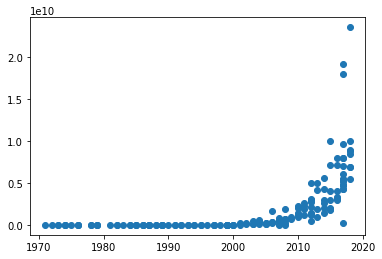

In [0]:
# plot the data
plt.scatter(X, Y)

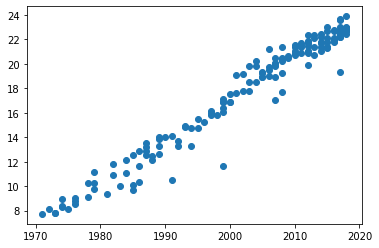

In [0]:
# take the log to the data to make it linear
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
# center the X data so that the values are not too large
# could do scaling, but data needs to be reversed back to original values later.
X = X - X.mean()

In [0]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss="mse")

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 484us/sample - loss: 358.5643
Epoch 2/200
162/162 [==============================] - 0s 77us/sample - loss: 584.6760
Epoch 3/200
162/162 [==============================] - 0s 67us/sample - loss: 282.8847
Epoch 4/200
162/162 [==============================] - 0s 62us/sample - loss: 200.4677
Epoch 5/200
162/162 [==============================] - 0s 57us/sample - loss: 144.6382
Epoch 6/200
162/162 [==============================] - 0s 51us/sample - loss: 135.4541
Epoch 7/200
162/162 [==============================] - 0s 48us/sample - loss: 114.9627
Epoch 8/200
162/162 [==============================] - 0s 46us/sample - loss: 81.4380
Epoch 9/200
162/162 [==============================] - 0s 46us/sample - loss: 53.3803
Epoch 10/200
162/162 [==============================] - 0s 45us/sample - loss: 32.6262
Epoch 11/200
162/162 [==============================] - 0s 47us/sample - loss: 24.8107
Epoch 12/200
162/162 [=

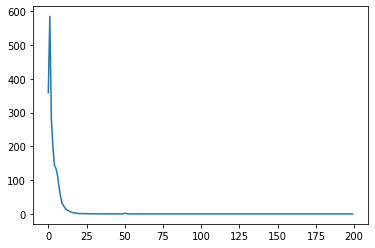

In [0]:
# plot the loss
plt.plot(r.history["loss"], label="loss")

In [0]:
# get the slope of the line
print(model.layers)
print(model.layers[0].get_weights()) # first element is weight, second one is bias
a = model.layers[0].get_weights()[0][0,0] # slope

[array([[0.34576222]], dtype=float32), array([17.767662], dtype=float32)]


Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [0]:
print("Time to double:", np.log(2) / a)

Time to double: 2.004693209498861


In [0]:
# the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

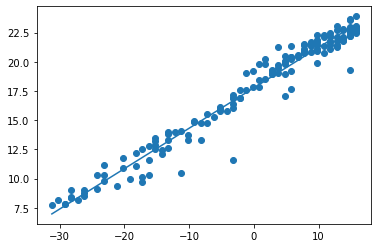

In [0]:
# Make prediction
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [0]:
# manual calculation

# get weights
w, b = model.layers[0].get_weights()
X = X.reshape(-1, 1)
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)

True